In [4]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf

# Display preferences.
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
warnings.filterwarnings(
    action="ignore",
    module="scipy",
    message="^internal gelsd"
)

In [5]:
# Acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1,1)
X = data[['TV', 'Radio', 'Newspaper']]
regr.fit(X, Y)

# Inspect the results.
print('\ncoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


In [32]:
data2 = data
data2['TxR'] = data2['TV'] * data2['Radio']
data2['TandR'] = data2['TV'] + data2['TV']
lows = []
for row in data2['TandR']:
    if row > 50:
        lows.append(0)
    else:
        lows.append(1)
data2['Low'] = lows 

# Instantiate and fit our model.
regr2 = linear_model.LinearRegression()
Y2 = data['Sales'].values.reshape(-1,1)
X2 = data[['TV', 'Radio', 'TxR', 'Low']]
regr2.fit(X2, Y2)

# Inspect the results.
print('\ncoefficients: \n', regr2.coef_)
print('\nIntercept: \n', regr2.intercept_)
print('\nR-squared:')
print(regr2.score(X2,Y2))


coefficients: 
 [[ 1.46390740e-02  3.68072495e-02  1.05920593e-03 -2.66438600e+00]]

Intercept: 
 [7.59645372]

R-squared:
0.9852238673359472


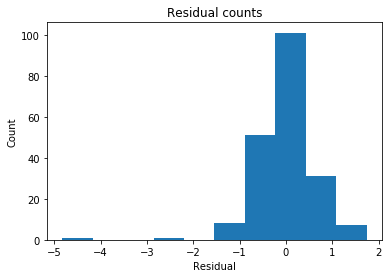

In [33]:
# Extract predicted values.
predicted = regr2.predict(X2).ravel()
actual = data2['Sales']

# Calculate the error, also called the residual.
residual = actual - predicted

# This looks a bit concerning.
plt.hist(residual)
plt.title('Residual counts')
plt.xlabel('Residual')
plt.ylabel('Count')
plt.show()

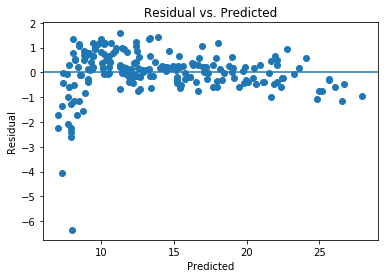

In [31]:
plt.scatter(predicted, residual)
plt.xlabel('Predicted')
plt.ylabel('Residual')
plt.axhline(y=0)
plt.title('Residual vs. Predicted')
plt.show()
